In [1]:
import pandas as pd
import math
import itertools as itl
import csv
import matplotlib.pyplot as plt

from collections import Counter
from apyori import apriori
from pandas.io.json import json_normalize

In [2]:
basketData = pd.read_csv('groceries.csv', header=None)
basketList = basketData.values.tolist()

In [3]:
cleanList =  [[x for x in set(y) if ((isinstance(x, str) and x != 'nan') or not math.isnan(x))] for y in basketList]

In [4]:
items = list(itl.chain.from_iterable(cleanList))
itCnt = dict(Counter(items))

In [5]:
rules = apriori(cleanList, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [6]:
ruleList = list(rules)

In [7]:
ruleJson = [{
    'BasketItems': ','.join([str(x) for x in rule.items]),
    'Support': rule.support,
    'Antecedent': ','.join([str(y) for y in rule.ordered_statistics[0].items_base]),
    'Consequent': ','.join([str(z) for z in rule.ordered_statistics[0].items_add]),
    'Confidence': rule.ordered_statistics[0].confidence,
    'Lift': rule.ordered_statistics[0].lift
} for rule in ruleList]

In [8]:
ruleDf = json_normalize(ruleJson)
ruleDf

BasketItems   Support  \
0                 hamburger meat,Instant food products  0.003050   
1                     whipped/sour cream,baking powder  0.004575   
2                                 root vegetables,beef  0.017387   
3                           berries,whipped/sour cream  0.009049   
4                                  liquor,bottled beer  0.004677   
..                                                 ...       ...   
219  whipped/sour cream,root vegetables,yogurt,whol...  0.003660   
220           whole milk,sausage,tropical fruit,yogurt  0.003152   
221  whipped/sour cream,tropical fruit,yogurt,whole...  0.004372   
222  root vegetables,tropical fruit,other vegetable...  0.003152   
223  root vegetables,tropical fruit,other vegetable...  0.003559   

                                          Antecedent  \
0                              Instant food products   
1                                      baking powder   
2                                               beef   
3                                            berries   
4                                             liquor   
..                                               ...   
219               whipped/sour cream,root vegetables   
220                           sausage,tropical fruit   
221                whipped/sour cream,tropical fruit   
222    citrus fruit,root vegetables,other vegetables   
223  other vegetables,root vegetables,tropical fruit   

                    Consequent  Confidence       Lift  
0               hamburger meat    0.379747  11.421438  
1           whipped/sour cream    0.258621   3.607850  
2              root vegetables    0.331395   3.040367  
3           whipped/sour cream    0.272171   3.796886  
4                 bottled beer    0.422018   5.240594  
..                         ...         ...        ...  
219          yogurt,whole milk    0.214286   3.824864  
220          yogurt,whole milk    0.226277   4.038907  
221          yogurt,whole milk    0.316176   5.643549  
222  whole milk,tropical fruit    0.303922   7.185261  
223          yogurt,whole milk    0.289256   5.163039  

[224 rows x 6 columns]

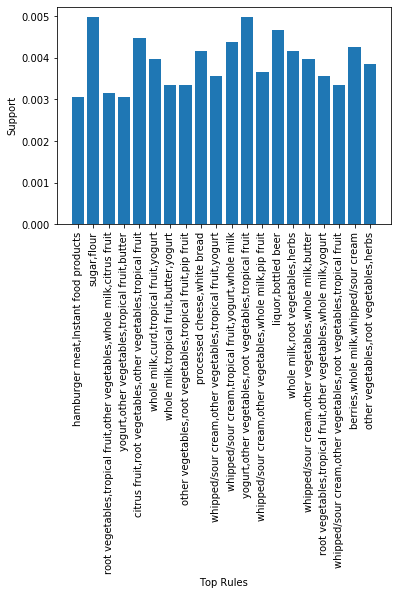

In [20]:
topNByLiftAndConfidence = ruleDf.sort_values(by=['Lift', 'Confidence'], ascending=False)[:20]
plt.bar(topNByLiftAndConfidence.BasketItems, topNByLiftAndConfidence.Support)
plt.xticks(rotation='vertical')
plt.xlabel('Top Rules')
plt.ylabel('Support')
plt.show()

In [19]:
topNBySupport = ruleDf.sort_values(by='Support', ascending=False)
plt.scatter(topNBySupport.Lift, topNBySupport.Confidence)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.show()

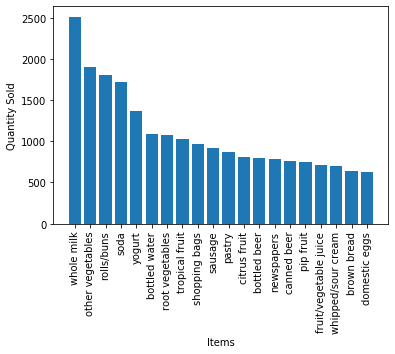

In [22]:
topNItems = {k: v for k, v in sorted(itCnt.items(), key=lambda item: item[1], reverse=True)[:20]}
plt.bar(range(len(topNItems)), list(topNItems.values()), align='center')
plt.xticks(range(len(topNItems)), list(topNItems.keys()), rotation='vertical')
plt.xlabel('Items')
plt.ylabel('Quantity Sold')
plt.show()

In [23]:
with open('items.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(('Product','Count'))
    for k in itCnt:
        csv_out.writerow((k,itCnt[k]))

In [24]:
with open('Rules.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(('RuleNo.', 'BasketItems', 'Support', 'Antecedent', 'Consequent', 'Confidence', 'Lift'))
    ix = 1
    for r in ruleList:
        test = r
        sItems = ','.join([str(x) for x in test.items])
        sSupport = test.support
        sOrdSt = test.ordered_statistics[0]
        sAntecedent = ','.join([str(x) for x in sOrdSt.items_base])
        sConsequent = ','.join([str(x) for x in sOrdSt.items_add])
        sConfidence = sOrdSt.confidence
        sLift = sOrdSt.lift
        csv_out.writerow(['Rule_'+str(ix), sItems, sSupport, sAntecedent, sConsequent, sConfidence, sLift])
        ix += 1
